#  YouTube Trending Video Analytics

This project analyzes YouTube trending videos data across different regions using Python. It includes data cleaning, exploratory data analysis, sentiment analysis, and visualization.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
# Optional: For interactive visuals
# import plotly.express as px

In [42]:
# Load dataset
# Replace with your path if different
df = pd.read_csv('USvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [43]:
df.shape

(40949, 16)

In [44]:
df.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


In [45]:
df.duplicated().sum()

np.int64(48)

In [46]:
# Convert date column and handle missing values
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15167 entries, 3400 to 40548
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                15167 non-null  object             
 1   trending_date           15167 non-null  datetime64[ns]     
 2   title                   15167 non-null  object             
 3   channel_title           15167 non-null  object             
 4   category_id             15167 non-null  int64              
 5   publish_time            15167 non-null  datetime64[ns, UTC]
 6   tags                    15167 non-null  object             
 7   views                   15167 non-null  int64              
 8   likes                   15167 non-null  int64              
 9   dislikes                15167 non-null  int64              
 10  comment_count           15167 non-null  int64              
 11  thumbnail_link          15167 non-null  obj

<ipython-input-46-ba089af0f75f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')


In [47]:
df.describe()

,trending_date,category_id,views,likes,dislikes,comment_count
count,15167,15167.000000,1.516700e+04,1.516700e+04,1.516700e+04,1.516700e+04
mean,2005-05-03 23:21:04.402980096,19.938023,2.476315e+06,7.710713e+04,3.665152e+03,8.383274e+03
min,2001-01-18 00:00:00,1.000000,7.890000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2002-10-18 00:00:00,17.000000,2.641400e+05,5.844000e+03,2.170000e+02,6.470000e+02
50%,2004-05-18 00:00:00,24.000000,7.407750e+05,1.952400e+04,6.910000e+02,1.998000e+03
75%,2006-05-18 00:00:00,25.000000,1.943522e+06,6.079800e+04,2.032500e+03,6.288000e+03
max,2012-12-17 00:00:00,43.000000,2.252119e+08,5.613827e+06,1.545015e+06,1.228655e+06
std,NaN,7.582557,7.149017e+06,2.173525e+05,2.689185e+04,3.004256e+04


In [48]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [49]:
# Most viewed videos
most_viewed = df.sort_values('views', ascending=False).head(10)
most_viewed[['title', 'channel_title', 'views']]

,title,channel_title,views
38547,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,225211923
38345,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,220490543
5699,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,125432237
38273,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,123010920
33748,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,122581156
33546,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,117735467
5452,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113874632
33339,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,112904452
33132,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,107576105
33743,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,104400749


In [50]:
grouped = df.groupby('tags')['views'].max().reset_index()
grouped.sort_values('views', ascending=False).head(10)

,tags,views
286,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923
1040,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237
137,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920
110,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",122581156
158,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",104400749
2525,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",91933007
261,"Cardi B|""I Like It""|""Invasion of Privacy""|""Bad...",85159766
1317,"The|""Weeknd""|""Call""|""Out""|""My""|""Name""",70242925
805,"Maroon|""Girls""|""Like""|""You""|""Interscope""|""Reco...",66529577
1380,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",58530197


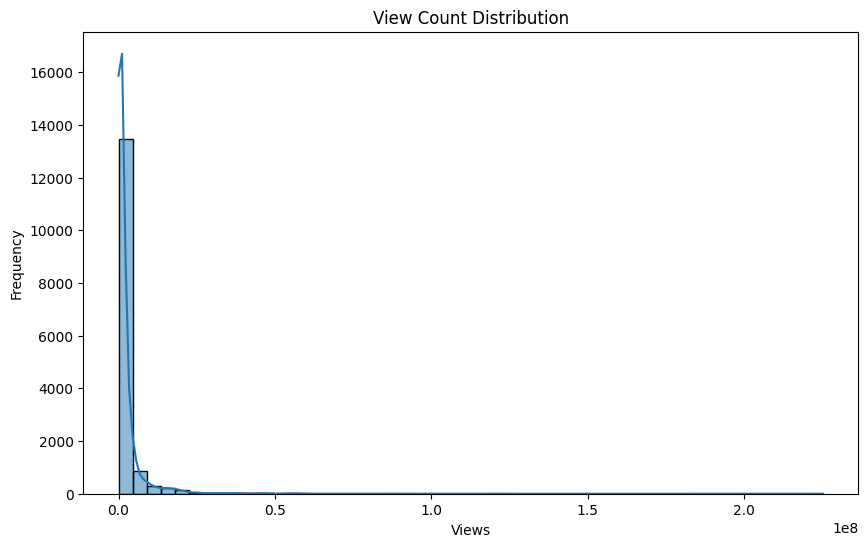

In [51]:
# Plot view distribution
plt.figure(figsize=(10,6))
sns.histplot(df['views'], bins=50, kde=True)
plt.title('View Count Distribution')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

In [52]:
# Sentiment analysis on video titles
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity
df['title_sentiment'] = df['title'].apply(get_sentiment)
df[['title', 'title_sentiment']].head()

,title,title_sentiment
3400,Marvel Studios' Avengers: Infinity War Officia...,0.000000
3401,The New Snapchat in 60 Seconds,0.136364
3402,"Jay-Z and Dean Baquet, in Conversation",0.000000
3403,Matt Lauer Has Been Fired From NBC News | TODAY,0.000000
3404,ALL THE MONEY IN THE WORLD - Official Trailer ...,0.000000


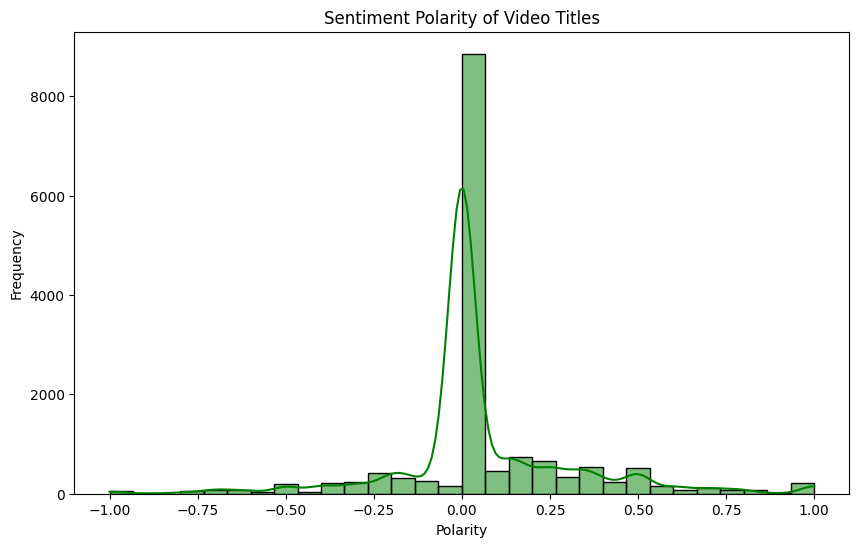

In [53]:
# Plot sentiment distribution
plt.figure(figsize=(10,6))
sns.histplot(df['title_sentiment'], bins=30, kde=True, color='green')
plt.title('Sentiment Polarity of Video Titles')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

In [54]:
def tag_sentiments(tag):
  return TextBlob(str(tag)).sentiment.polarity
df['sentiment_tags']=df['tags'].apply(tag_sentiments)
df[['tags', 'sentiment_tags']].sort_values(by='sentiment_tags', ascending=False).head()

,tags,sentiment_tags
17203,"channel awesome|""nostalgia critic""|""doug walke...",1.0
3467,"money|""finance""|""youtube""|""vlogbrothers""|""econ...",1.0
15520,"being a sore loser|""anwar""|""jibawi""|""being""|""s...",1.0
11148,"hazel|""hazel hayes""|""chewingsand""|""chewing san...",1.0
4679,"kayleymelissa|""kayley melissa""|""letsmakeitup1""...",1.0


In [55]:
df.to_csv('YouTube_Trending_Analytics_US',index=False)

In [56]:
# prompt: df['tags'].value_counts().head(20) & df['views'].head(20) want to know the trending views relation

trending = df.groupby('tags')['views'].sum().sort_values(ascending=False).head(20)
trending


,views
tags,
[none],980507455
"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""|""Universal""|""Records""|""Pop""",908736507
"Childish Gambino|""Rap""|""This Is America""|""mcDJ Recording/RCA Records""",743821112
"Becky G|""Natti Natasha""|""Natti Natasha Music""|""Natti Natasha Official Video""|""Natti Natasha Video""|""Natti Natasha Video Oficial""|""Natti Natasha Nuevo Video""|""Natti Natasha New Video""|""Sin Pijama Official Video""|""Official Video""|""Sin Pijama Official Remix Video""|""Sin Pijama Single""|""Single""|""Natti Natasha New Single""|""Natti Natasha Single""|""Natti Natasha Song""|""Sin Pijama new song""|""Sin Pijama nueva canción""|""Natti Natasha nueva cancion""|""Natti""|""Natasha""|""en""",738805067
"Cardi B|""I Like It""|""Invasion of Privacy""|""Bad Bunny""|""J Balvin""|""Bronx""|""New York""|""Rap""|""Hip Hop""|""Bodak Yellow""|""Bartier Cardi""|""8zSRkr1nQNw""|""Cardi""|""Bardi""",683612091
"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""Marvel Comics""|""Planet of the Symbiotes""|""Eddie Brock""|""Tom Hardy""|""Ruben Fleischer""|""Spider-man""|""Spider-man: Homecoming""|""Michelle Williams""|""Jenny Slate""|""Riz Ahmed""|""Spider-man Spinoff""|""We Are Venom""|""Peter Parker""|""Sony Pictures Entertainment""|""film""|""movie""|""official""|""official venom movie trailer""|""official trailer""|""sony pictures venom""",677341656
"marvel|""comics""|""comic books""|""nerdy""|""geeky""|""super hero""|""superhero""|""avengers: infinity war""|""avengers""|""infinity war""|""marvel studios""",631749120
"Sanju Teaser|""Official Teaser""|""Sanju Official Teaser""|""sanjay dutt biopic""|""sanjay dutt biopic teaser""|""sanjay dutt biopic film""|""sanjay dutt new movie""|""rajkumar hirani movies""|""Ranbir Kapoor""|""Paresh Rawal""|""Manisha Koirala""|""Anushka Sharma""|""Sonam Kapoor""|""Dia Mirza""|""Vicky Kaushal""|""Jim Sarbh""|""Boman Irani""|""Vinod Chopra Films""|""Rajkumar Hirani Films""|""Fox Star Studios""|""ranbir kapoor sanjay dutt biopic""|""ranbir kapoor sanjay dutt biopic movie""|""ranbir kapoor sanjay dutt film""",501886194
"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#YouTubeRewind""|""Rewind 2016""|""Dan and Phil""|""Grace Helbig""|""HolaSoyGerman""|""Lilly Singh""|""Markiplier""|""Swoozie""|""Rhett Link""|""Liza Koshy""|""Dolan Twins""|""Lele Pons""|""Jake Paul""|""Logan Paul""|""KSI""|""Joey Graceffa""|""Casey Neistat""|""Poppy""|""Niana Guerrero""|""Daddy Yankee""|""Luis Fonsi""|""Ed Sheeran""|""Kendrick Lamar""|""Stephen Colbert""|""Fidget Spinners""|""Slime""|""Backpack Kid""|""April the Giraffe""|""#Rewind""|""Despacito""|""Shape of you""|""YouTubeRewind""|""I’m the One""|""Humble""",493581793
